<a href="https://colab.research.google.com/github/AngelTroncoso/OptimizacionAeroPortuaria/blob/main/OptimizacionAeroPortuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelo de regresión para predecir los retrasos en vuelos**

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [4]:
datos = pd.read_csv('/content/flights.csv')
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0.0,2010.0,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0.0,2010.0,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0.0,2010.0,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0.0,2010.0,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0.0,2010.0,False,15.016271


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10247 entries, 0 to 10246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       10247 non-null  int64  
 1   airline         10247 non-null  object 
 2   aircraft_type   10247 non-null  object 
 3   schengen        10247 non-null  object 
 4   origin          10247 non-null  object 
 5   arrival_time    10246 non-null  float64
 6   departure_time  10246 non-null  float64
 7   day             10246 non-null  float64
 8   year            10246 non-null  float64
 9   is_holiday      10246 non-null  object 
 10  delay           10246 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 880.7+ KB


In [6]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [7]:
datos.rename(columns={
    'flight_id': 'id_vuelo',
    'airline': 'aerolinea',
    'aircraft_type': 'tipo_aeronave',
    'schengen': 'schengen',
    'origin': 'origen',
    'arrival_time': 'hora_llegada',
    'departure_time': 'hora_salida',
    'day': 'dia',
    'year': 'año',
    'is_holiday': 'es_festivo',
    'delay': 'retraso'
}, inplace=True)

datos.columns


Index(['id_vuelo', 'aerolinea', 'tipo_aeronave', 'schengen', 'origen',
       'hora_llegada', 'hora_salida', 'dia', 'año', 'es_festivo', 'retraso'],
      dtype='object')

In [8]:
datos.describe()

,id_vuelo,hora_llegada,hora_salida,dia,año,retraso
count,10247.000000,10246.000000,10246.000000,10246.000000,10246.000000,10246.000000
mean,15.368986,13.312887,16.517845,171.072907,2010.465645,12.373824
std,8.698699,4.028235,4.134820,99.980078,0.498843,23.360239
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-39.547831
25%,8.000000,8.939996,12.668655,85.000000,2010.000000,-4.619717
50%,15.000000,14.376052,17.967963,170.000000,2010.000000,9.396270
75%,23.000000,16.909690,20.041281,256.000000,2011.000000,27.479616
max,30.000000,19.341235,23.341235,364.000000,2011.000000,112.817711


In [9]:
#para analizar variables categoricas
datos.describe(include='O')

,aerolinea,tipo_aeronave,schengen,origen,es_festivo
count,10247,10247,10247,10247,10246
unique,3,6,2,11,2
top,BZ,Airbus A320,schengen,TZF,False
freq,6918,4365,6193,2012,9676


In [13]:
datos.head()

,id_vuelo,aerolinea,tipo_aeronave,schengen,origen,hora_llegada,hora_salida,dia,año,es_festivo,retraso
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0.0,2010.0,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0.0,2010.0,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0.0,2010.0,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0.0,2010.0,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0.0,2010.0,False,15.016271


In [16]:
#de segundos a minutos
round(.205981*60)

12

In [17]:
#de segundos a minutos
round(.885071*60)

53

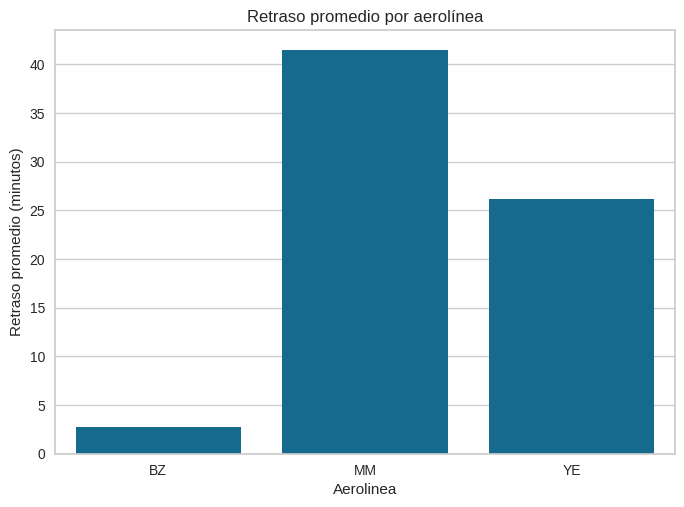

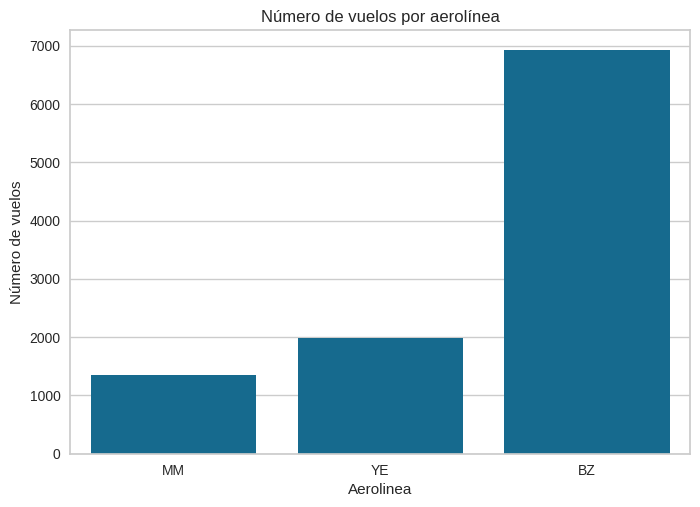

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay_by_airline = datos.groupby('aerolinea')['retraso'].mean().reset_index()
sns.barplot(x='aerolinea', y='retraso', data=avg_delay_by_airline)
plt.title('Retraso promedio por aerolínea')
plt.xlabel('Aerolinea')
plt.ylabel('Retraso promedio (minutos)')
plt.show()

sns.countplot(x='aerolinea', data=datos)
plt.title('Número de vuelos por aerolínea')
plt.xlabel('Aerolinea')
plt.ylabel('Número de vuelos')
plt.show()

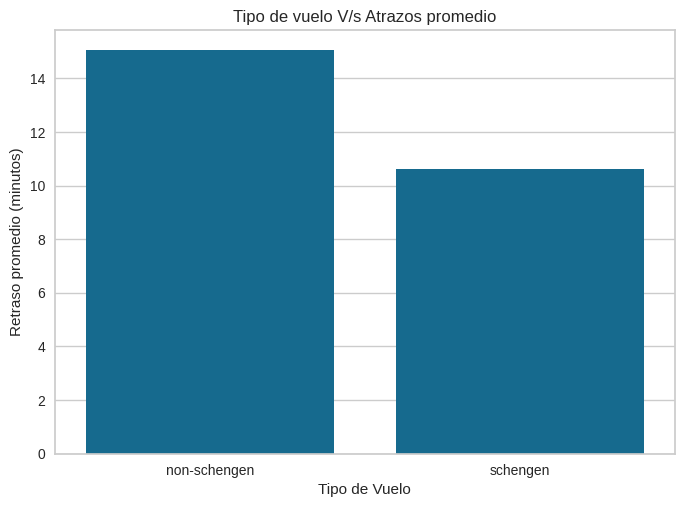

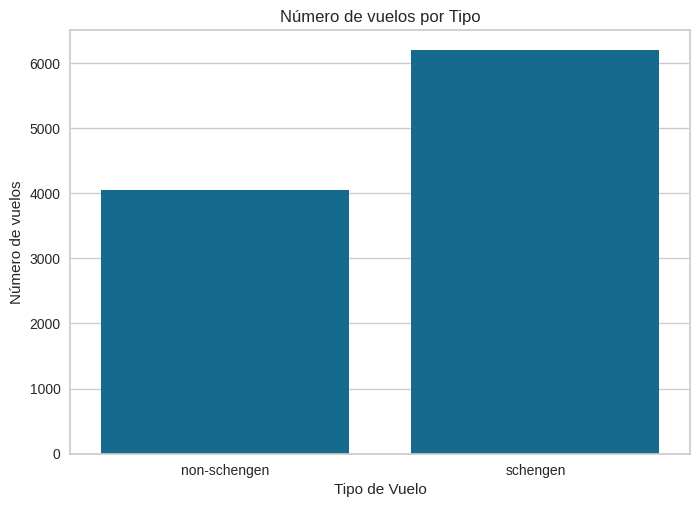

In [20]:
avg_delay_by_airline = datos.groupby('schengen')['retraso'].mean().reset_index()
sns.barplot(x='schengen', y='retraso', data=avg_delay_by_airline)
plt.title('Tipo de vuelo V/s Atrazos promedio')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Retraso promedio (minutos)')
plt.show()

sns.countplot(x='schengen', data=datos)
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de vuelos')
plt.show()

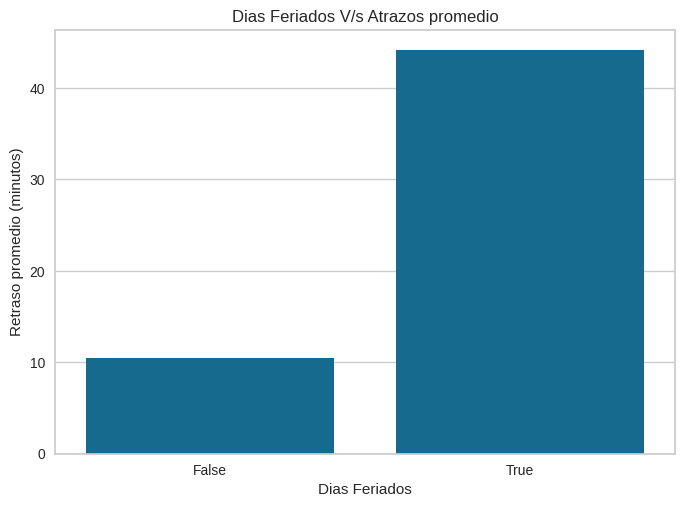

In [21]:
avg_delay_by_airline = datos.groupby('es_festivo')['retraso'].mean().reset_index()
sns.barplot(x='es_festivo', y='retraso', data=avg_delay_by_airline)
plt.title('Dias Feriados V/s Atrazos promedio')
plt.xlabel('Dias Feriados')
plt.ylabel('Retraso promedio (minutos)')
plt.show()


In [25]:
#para ver el orden de los valores.
datos['tipo_aeronave'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='tipo_aeronave')

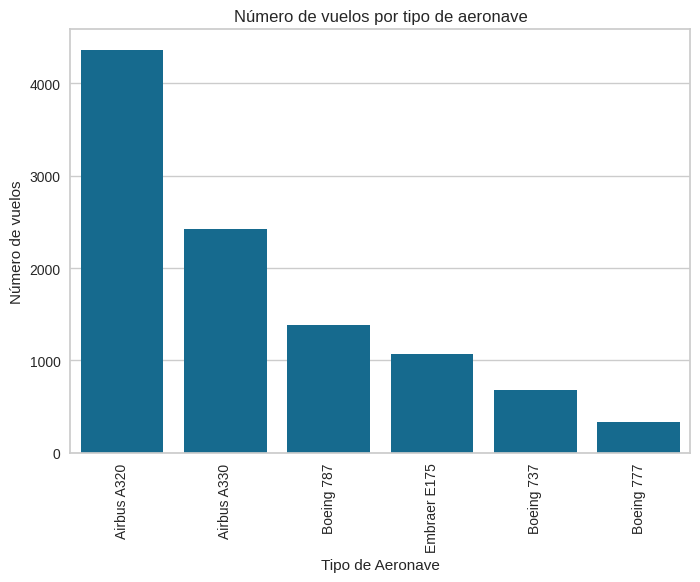

In [26]:
order = datos['tipo_aeronave'].value_counts().index
sns.countplot(x='tipo_aeronave', data=datos, order=order)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

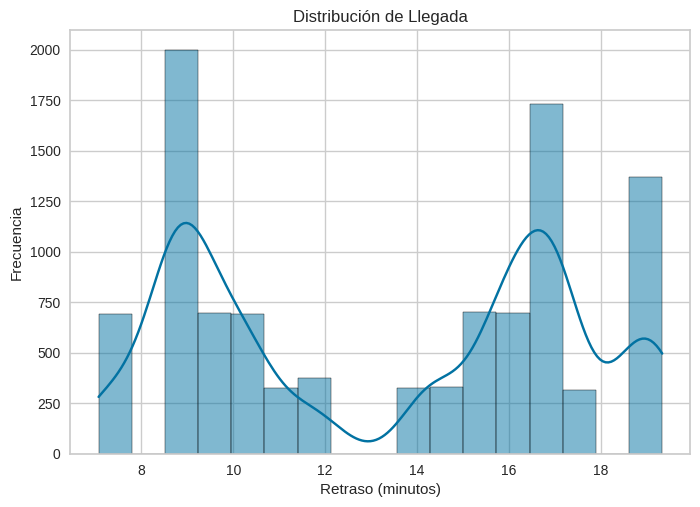

In [28]:
sns.histplot(datos['hora_llegada'], kde=True)
plt.title('Distribución de Llegada')
plt.xlabel('Retraso (minutos)')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

<Axes: xlabel='hora_llegada', ylabel='Count'>

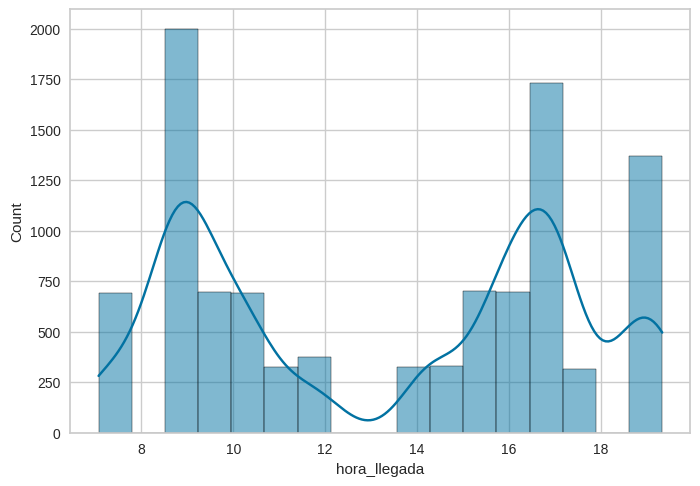

In [32]:
# Drop rows with NaN in 'hora_llegada' before calculating binwidth
datos_cleaned = datos.dropna(subset=['hora_llegada'])
binwidth = ancho_bin(datos_cleaned,'hora_llegada')
sns.histplot(data=datos_cleaned,x='hora_llegada',kde=True,binwidth=binwidth)

<Axes: xlabel='hora_llegada', ylabel='Count'>

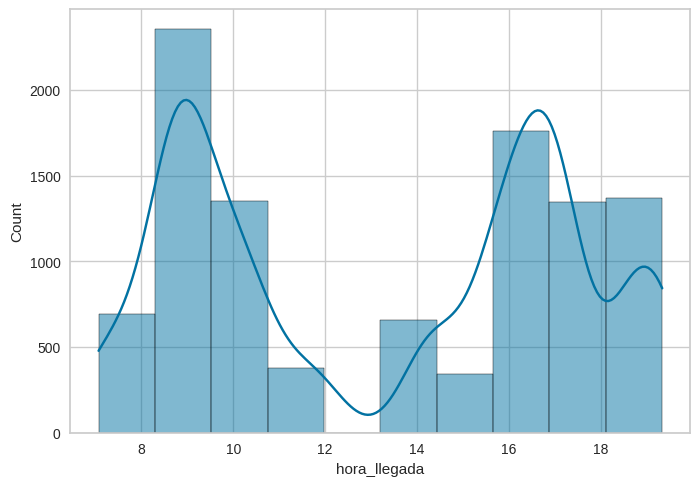

In [33]:
sns.histplot(data=datos_cleaned,x='hora_llegada',kde=True,bins=10)

<Axes: xlabel='hora_salida', ylabel='Count'>

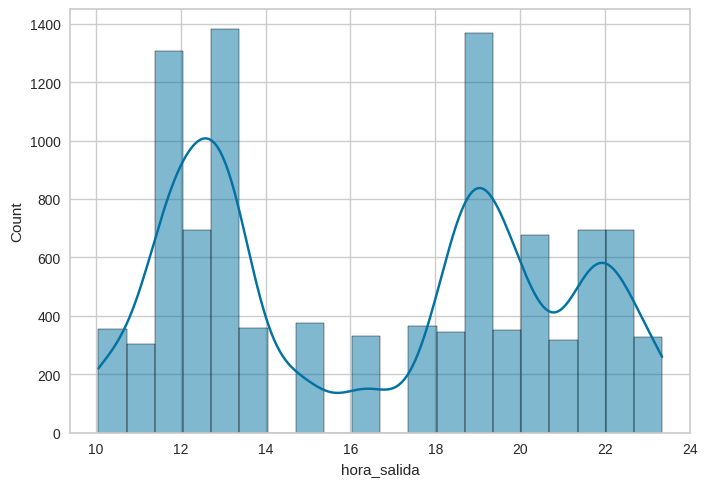

In [36]:
# Drop rows with NaN in 'hora_salida' before calculating binwidth
datos_cleaned = datos.dropna(subset=['hora_salida'])
binwidth = ancho_bin(datos_cleaned,'hora_salida')
sns.histplot(data=datos_cleaned,x='hora_salida', kde=True,binwidth=binwidth)

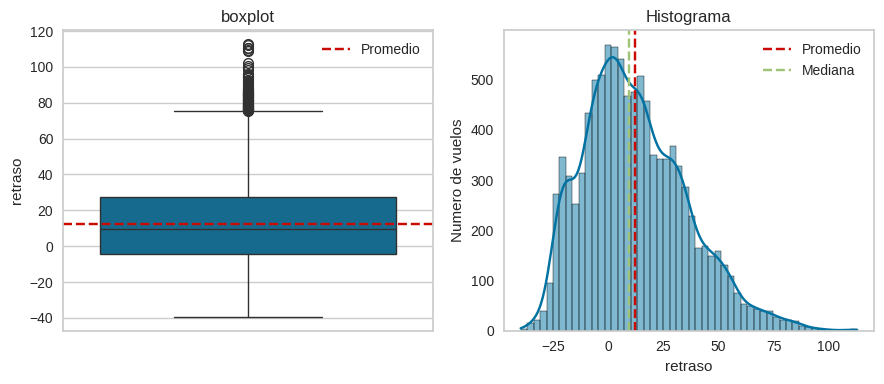

In [40]:
atraso_promedio = datos['retraso'].mean()
atraso_mediana = datos['retraso'].median()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=datos, y='retraso', ax=ax[0])
ax[0].set_title('boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

# Drop rows with NaN in 'retraso' before calculating binwidth and plotting
datos_cleaned_retraso = datos.dropna(subset=['retraso'])
binwidth = ancho_bin(datos_cleaned_retraso,'retraso')
sns.histplot(data=datos_cleaned_retraso, x='retraso', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='g', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

#**Clase 2**

In [41]:
datos.columns

Index(['id_vuelo', 'aerolinea', 'tipo_aeronave', 'schengen', 'origen',
       'hora_llegada', 'hora_salida', 'dia', 'año', 'es_festivo', 'retraso'],
      dtype='object')

In [61]:
import warnings

warnings.filterwarnings('ignore')

In [62]:
# Drop rows with NaN in 'año' or 'dia' before creating the 'fecha' column
datos = datos.dropna(subset=['año', 'dia'])
datos['fecha'] = datos['año'].astype(int).astype(str) + '-' + (datos['dia'] + 1).astype(int).astype(str)
datos['fecha'] = pd.to_datetime(datos['fecha'], format='%Y-%j')
datos.tail(2)

,id_vuelo,aerolinea,tipo_aeronave,schengen,origen,hora_llegada,hora_salida,dia,año,es_festivo,retraso,datos,fecha,es_finde,nombre_dia
10244,16,MM,Airbus A320,0,CSF,17.041281,20.041281,317.0,2011.0,0,47.899508,2011.0-318.0,2011-11-14,0,Monday
10245,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,318.0,2011.0,0,7.395096,2011.0-319.0,2011-11-15,0,Tuesday


In [63]:
datos['es_finde']= datos['fecha'].dt.weekday.isin([5,6])
datos['nombre_dia']= datos['fecha'].dt.day_name()
datos.sample(5)

,id_vuelo,aerolinea,tipo_aeronave,schengen,origen,hora_llegada,hora_salida,dia,año,es_festivo,retraso,datos,fecha,es_finde,nombre_dia
7714,16,MM,Airbus A320,0,CSF,17.041281,20.041281,149.0,2011.0,0,65.202761,2011.0-150.0,2011-05-30,False,Monday
9364,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,259.0,2011.0,0,44.885314,2011.0-260.0,2011-09-17,True,Saturday
814,26,MM,Airbus A320,0,TCY,8.885071,10.885071,54.0,2010.0,0,26.421293,2010.0-55.0,2010-02-24,False,Wednesday
942,2,BZ,Airbus A320,schengen,ZQO,19.196804,22.196804,62.0,2010.0,0,30.171690,2010.0-63.0,2010-03-04,False,Thursday
6198,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,48.0,2011.0,0,-0.176048,2011.0-49.0,2011-02-18,False,Friday


In [64]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10246 entries, 0 to 10245
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_vuelo       10246 non-null  int64         
 1   aerolinea      10246 non-null  object        
 2   tipo_aeronave  10246 non-null  object        
 3   schengen       10246 non-null  object        
 4   origen         10246 non-null  object        
 5   hora_llegada   10246 non-null  float64       
 6   hora_salida    10246 non-null  float64       
 7   dia            10246 non-null  float64       
 8   año            10246 non-null  float64       
 9   es_festivo     10246 non-null  int64         
 10  retraso        10246 non-null  float64       
 11  datos          10246 non-null  object        
 12  fecha          10246 non-null  datetime64[ns]
 13  es_finde       10246 non-null  bool          
 14  nombre_dia     10246 non-null  object        
dtypes: bool(1), datetime64[n

In [65]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'shengen':1})
datos['es_festivo'] = datos['es_festivo'].replace({False:0, True:1})
datos['es_finde'] = datos['es_finde'].replace({False:0, True:1})
datos.sample(3)

,id_vuelo,aerolinea,tipo_aeronave,schengen,origen,hora_llegada,hora_salida,dia,año,es_festivo,retraso,datos,fecha,es_finde,nombre_dia
6342,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,57.0,2011.0,0,-18.012329,2011.0-58.0,2011-02-27,1,Sunday
2633,4,BZ,Airbus A330,schengen,TCY,11.781391,14.781391,175.0,2010.0,0,2.060060,2010.0-176.0,2010-06-25,0,Friday
10106,25,BZ,Boeing 777,0,CSF,19.341235,23.341235,308.0,2011.0,0,40.136983,2011.0-309.0,2011-11-05,1,Saturday


In [66]:
categoricas = ['aerolinea', 'tipo_aeronave', 'origen', 'nombre_dia' ]
pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,id_vuelo,schengen,hora_llegada,hora_salida,dia,año,es_festivo,retraso,datos,fecha,...,origen_TCY,origen_TZF,origen_ZQO,nombre_dia_Friday,nombre_dia_Monday,nombre_dia_Saturday,nombre_dia_Sunday,nombre_dia_Thursday,nombre_dia_Tuesday,nombre_dia_Wednesday
0,26,0,8.885071,10.885071,0.0,2010.0,0,70.205981,2010.0-1.0,2010-01-01,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0.0,2010.0,0,38.484609,2010.0-1.0,2010-01-01,...,1,0,0,1,0,0,0,0,0,0
2,3,schengen,18.635384,22.635384,0.0,2010.0,0,2.388305,2010.0-1.0,2010-01-01,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0.0,2010.0,0,19.138491,2010.0-1.0,2010-01-01,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0.0,2010.0,0,15.016271,2010.0-1.0,2010-01-01,...,0,0,0,1,0,0,0,0,0,0


In [67]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,id_vuelo,schengen,hora_llegada,hora_salida,dia,año,es_festivo,retraso,datos,fecha,...,origen_TCY,origen_TZF,origen_ZQO,nombre_dia_Friday,nombre_dia_Monday,nombre_dia_Saturday,nombre_dia_Sunday,nombre_dia_Thursday,nombre_dia_Tuesday,nombre_dia_Wednesday
9516,9,0,10.733469,12.733469,269.0,2011.0,0,-18.881273,2011.0-270.0,2011-09-27,...,0,1,0,0,0,0,0,0,1,0
8255,7,schengen,8.564949,13.564949,185.0,2011.0,1,49.515930,2011.0-186.0,2011-07-05,...,0,1,0,0,0,0,0,0,1,0
3704,13,0,10.172731,13.172731,246.0,2010.0,0,-23.665102,2010.0-247.0,2010-09-04,...,1,0,0,0,0,1,0,0,0,0
7453,12,schengen,17.313731,21.313731,131.0,2011.0,0,22.077182,2011.0-132.0,2011-05-12,...,0,1,0,0,0,0,0,1,0,0
941,1,0,15.496519,18.496519,62.0,2010.0,0,37.364997,2010.0-63.0,2010-03-04,...,0,0,0,0,0,0,0,1,0,0


In [68]:
#metodo de correlaciones
datos[['hora_llegada','hora_salida']].corr()

,hora_llegada,hora_salida
hora_llegada,1.000000,0.973883
hora_salida,0.973883,1.000000


In [69]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10246 entries, 0 to 10245
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_vuelo                    10246 non-null  int64         
 1   schengen                    10246 non-null  object        
 2   hora_llegada                10246 non-null  float64       
 3   hora_salida                 10246 non-null  float64       
 4   dia                         10246 non-null  float64       
 5   año                         10246 non-null  float64       
 6   es_festivo                  10246 non-null  int64         
 7   retraso                     10246 non-null  float64       
 8   datos                       10246 non-null  object        
 9   fecha                       10246 non-null  datetime64[ns]
 10  es_finde                    10246 non-null  int64         
 11  aerolinea_BZ                10246 non-null  int64         


In [72]:
df = datos_codificados.drop(columns=['dia','año','fecha', 'id_vuelo', 'hora_salida' ])
df.sample(10)

,schengen,hora_llegada,es_festivo,retraso,datos,es_finde,aerolinea_BZ,aerolinea_MM,aerolinea_YE,tipo_aeronave_Airbus A320,...,origen_TCY,origen_TZF,origen_ZQO,nombre_dia_Friday,nombre_dia_Monday,nombre_dia_Saturday,nombre_dia_Sunday,nombre_dia_Thursday,nombre_dia_Tuesday,nombre_dia_Wednesday
6940,0,8.885071,0,56.266516,2011.0-98.0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
9825,schengen,9.668655,0,8.608687,2011.0-291.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5096,schengen,17.313731,0,32.106365,2010.0-340.0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
5499,schengen,16.909690,0,28.368678,2011.0-2.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9500,0,10.172731,0,-14.473845,2011.0-269.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8014,0,8.939996,0,39.056895,2011.0-170.0,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
9096,schengen,17.313731,0,25.438444,2011.0-242.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
8551,schengen,14.376052,0,-8.884966,2011.0-206.0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
10035,0,15.967963,0,-18.616022,2011.0-305.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5686,0,15.496519,0,46.580697,2011.0-15.0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


#**Clase 3**

In [78]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

x = df.drop(['retraso'],axis = 1)
y = df['retraso']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse,4),
      'MAE':round(mae,4),
      'R2':round(r2,4)
  }
  return metricas

In [83]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': np.float64(23.4835), 'MAE': 18.8124, 'R2': -0.0}

#**Para saber más: el Espacio Schengen**

El Espacio Schengen es un área geográfica que abarca la mayoría de los países europeos, donde se han eliminado los controles fronterizos para permitir la libre circulación de personas entre los países miembros. Esta área recibe su nombre en referencia al Acuerdo de Schengen, firmado en 1985 en la aldea de Schengen, en Luxemburgo, e implementado en 1995.

El acuerdo fue nombrado así por el lugar de la firma, pero el tratado Schengen en sí fue un desarrollo del Acuerdo de Schengen de 1990.

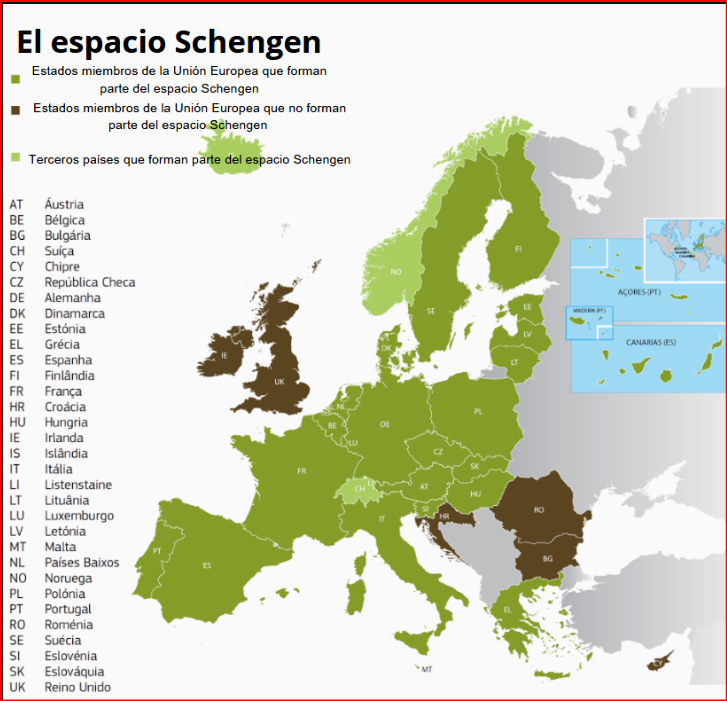

Fuente: Mapa del Espacio Schengen en 2017.

Los países que forman parte del Espacio Schengen han abolido los controles fronterizos en las fronteras internas, lo que significa que no es necesario presentar un pasaporte o pasar por verificaciones de inmigración al viajar entre estos países. En las fronteras externas, sin embargo, es más riguroso y común, para garantizar la seguridad y el control de la inmigración.

Actualmente, la mayoría de los países de la Unión Europea (UE) forman parte del Espacio Schengen, junto con Noruega, Islandia, Suiza y Liechtenstein, que no son miembros de la UE. Sin embargo, es importante notar que no todos los países de la UE han adherido al Acuerdo de Schengen.

La libre circulación dentro del Espacio Schengen facilita los viajes y el comercio entre los países miembros, convirtiéndolo en una parte fundamental de la integración europea y un ejemplo de cooperación transfronteriza en cuestiones de seguridad e inmigración.

#**Objetivo del boxplot**

El boxplot, también conocido como diagrama de caja, es una representación gráfica que nos permite visualizar la distribución de los datos de una forma más clara y objetiva. Está compuesto por: un rectángulo que representa la medianas y los cuartiles de los datos, además de líneas que se extienden hacia fuera del rectángulo, que muestran el rango de los datos, conforme a la imagen a continuación:

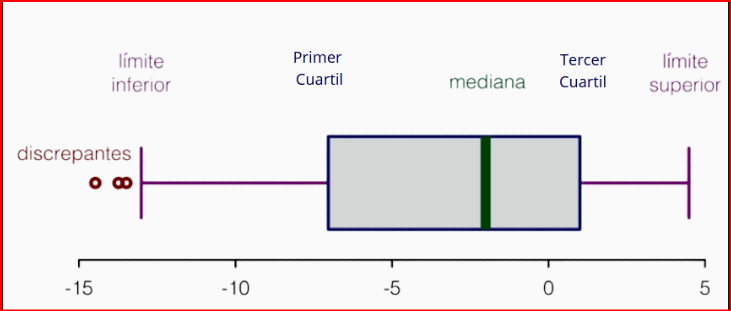

Donde:

El límite inferior es el valor mínimo que un dato puede tener sin ser considerado un valor atípico (outlier). Se calcula como Q1 - 1,5 x IQR (donde IQR es el rango intercuartílico, es decir, la diferencia entre el tercer cuartil y el primer cuartil).
El primer cuartil (Q1) es el valor que divide los datos en 25% por debajo y 75% por encima de él. Es decir, el 25% de los datos están por debajo del Q1 y el 75% están por encima.
La mediana es el valor que divide los datos en 50% por debajo y 50% por encima de él.
El tercer cuartil (Q3) es el valor que divide los datos en 75% por debajo y 25% por encima de él. Es decir, el 75% de los datos están por debajo del Q3 y el 25% están por encima.
El límite superior es el valor máximo que un dato puede tener sin ser considerado un valor atípico. Se calcula como Q3 + 1,5 x IQR.
Ante esto, podemos decir que la finalidad del boxplot es:

R: Visualizar la distribución de los datos e identificar posibles candidatos a outliers.  
El boxplot se utiliza para visualizar la distribución de los datos e identificar posibles outliers. Muestra los cuartiles (Q1, Q2 y Q3), la mediana (Q2), además de indicar la presencia de valores extremos o discrepantes.

#**Para saber más: ¿qué es el feature engineering?**

El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

¿Qué son las features?
Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

La importancia del Feature Engineering:
Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.
Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo.
Técnicas de Feature Engineering:
Existen varias técnicas de feature engineering, incluyendo:

Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.
Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.
Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.

#**Feature engineering y su importancia**

En el área de ciencia de datos y aprendizaje automático, un concepto fundamental es la "Feature engineering" (Feature Engineering). Esta técnica desempeña un papel crucial en el desarrollo de modelos predictivos y analíticos, permitiendo que los científicos de datos extraigan información valiosa de los datos. En este sentido, ¿qué es la Feature engineering y por qué es importante?

R:La Feature engineering implica la creación, transformación y selección de variables a partir de datos en bruto.  
La Feature engineering es un proceso que implica la creación, transformación y selección de variables a partir de datos en bruto. El objetivo es mejorar la precisión del modelo, proporcionando información más significativa y relevante.

#**Manos a la obra: ¿cómo utilizar el OneHotEncoder de Sklearn?**

Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies(https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) de la biblioteca Pandas y el OneHotEncoder(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:

In [73]:
datos.columns


Index(['id_vuelo', 'aerolinea', 'tipo_aeronave', 'schengen', 'origen',
       'hora_llegada', 'hora_salida', 'dia', 'año', 'es_festivo', 'retraso',
       'datos', 'fecha', 'es_finde', 'nombre_dia'],
      dtype='object')

In [74]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = ['aerolinea','tipo_aeronave','origen','nombre_dia']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos

,onehotencoder__aerolinea_BZ,onehotencoder__aerolinea_MM,onehotencoder__aerolinea_YE,onehotencoder__tipo_aeronave_Airbus A320,onehotencoder__tipo_aeronave_Airbus A330,onehotencoder__tipo_aeronave_Boeing 737,onehotencoder__tipo_aeronave_Boeing 777,onehotencoder__tipo_aeronave_Boeing 787,onehotencoder__tipo_aeronave_Embraer E175,onehotencoder__origen_AUZ,...,remainder__schengen,remainder__hora_llegada,remainder__hora_salida,remainder__dia,remainder__año,remainder__es_festivo,remainder__retraso,remainder__datos,remainder__fecha,remainder__es_finde
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,8.885071,10.885071,0.0,2010.0,0,70.205981,2010.0-1.0,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,8.939996,11.939996,0.0,2010.0,0,38.484609,2010.0-1.0,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,schengen,18.635384,22.635384,0.0,2010.0,0,2.388305,2010.0-1.0,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,15.967963,17.967963,0.0,2010.0,0,19.138491,2010.0-1.0,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,16.571894,19.571894,0.0,2010.0,0,15.016271,2010.0-1.0,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10241,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,schengen,19.196804,22.196804,317.0,2011.0,0,-6.72465,2011.0-318.0,2011-11-14,0
10242,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,15.496519,18.496519,317.0,2011.0,0,1.227021,2011.0-318.0,2011-11-14,0
10243,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,17.041281,20.041281,317.0,2011.0,0,41.155272,2011.0-318.0,2011-11-14,0
10244,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,17.041281,20.041281,317.0,2011.0,0,47.899508,2011.0-318.0,2011-11-14,0


Analizando el código anterior paso a paso:

1 - from sklearn.compose import make_column_transformer

Este es un import del método make_column_transformer de la biblioteca sklearn.compose. Este método se usa para aplicar transformaciones específicas a columnas específicas de un DataFrame.

2 - from sklearn.preprocessing import OneHotEncoder

Este es un import del OneHotEncoder de la biblioteca sklearn.preprocessing. Este es el método que realmente realiza la codificación one-hot.

3 - categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

Aquí, estamos definiendo una lista de nombres de columnas que queremos transformar usando la codificación one-hot, que son las mismas definidas utilizando el get_dummies.

4 - one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoricas), remainder='passthrough')

Aquí, estamos creando un ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas. El argumento handle_unknown='ignore' significa que el OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación. El argumento remainder='passthrough' significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.

5 - datos = one_hot_enc.fit_transform(datos)

Aquí, estamos aplicando la transformación al DataFrame datos. El método fit_transform ajusta el transformador a los datos y luego transforma los datos.

6 - datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())

Aquí, estamos convirtiendo los datos transformados de nuevo a un DataFrame. También estamos definiendo los nombres de las columnas para que sean los nombres de características de salida del ColumnTransformer.

#**Para saber más: métricas utilizadas en regresión**

Durante el video, se presentaron algunas de las métricas más comunes para evaluar modelos de regresión, como RMSE, MAE y R2. Junto con estas métricas, existen diversas otras que pueden ser bastante útiles durante la evaluación de un modelo de regresión. A continuación, podrás encontrar algunas de las métricas más utilizadas y sus traducciones en español:

Mean squared error - MSE (Error Cuadrático Medio);
Mean absolute error - MAE (Error Absoluto Medio);
Root Mean Squared Error - RMSE (Raíz Cuadrada del Error Cuadrático Medio);
Mean Squared Logarithmic Error - MSLE (Error Logarítmico Cuadrático Medio); y
Mean Absolute Percentage Error - MAPE (Porcentaje del Error Absoluto Medio).
Mean squared error - MSE
El Mean Squared Error (MSE), o Error Cuadrático Medio, es una métrica ampliamente utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Esta métrica calcula la media de los errores cuadrados, donde cada error es la diferencia entre el valor previsto por el modelo y el valor real. La elevación al cuadrado da mayor peso a los errores mayores, lo que puede ser útil cuando esos errores son particularmente indeseables. El MSE se define matemáticamente como:

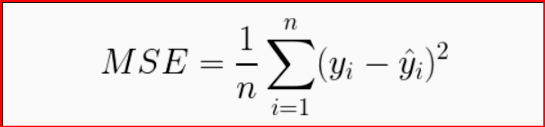

En esta fórmula, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSE se calcula tomando la diferencia entre los valores reales y los valores predichos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

Para evaluar la calidad de un modelo usando el MSE, cuanto más cerca de 0 esté el valor del MSE, mejor estará el modelo en predecir los valores deseados. Esto se debe a que un MSE de 0 indica que no hay diferencia entre los valores previstos y los valores reales, es decir, el modelo está haciendo predicciones perfectas.

Aunque el MSE es una métrica útil, vale la pena mencionar que tiene la desventaja de dar más peso a los outliers debido al cuadrado de cada término. Esto puede ser indeseable en muchos casos, llevando a los investigadores a usar alternativas, como el error absoluto medio (MAE).

La documentación de scikit-learn tiene información que ofrece más detalles sobre esta métrica en “mean_squared_error”.(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

Mean absolute error - MAE
El Error Absoluto Medio (MAE) es una medida de error común utilizada en modelos de regresión. Se calcula tomando la media de los valores absolutos de los errores. En otras palabras, para cada punto de datos, primero calculamos el error (la diferencia entre el valor predicho y el valor real), tomamos el valor absoluto de ese error (para asegurar que todos los errores sean positivos), y luego calculamos la media de todos estos errores absolutos. El MAE se define como:

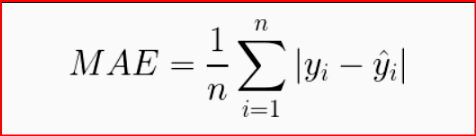

En esta ecuación, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MAE se calcula tomando la diferencia absoluta entre los valores reales y los valores predichos para todas las observaciones, sumando estas diferencias absolutas y, a continuación, dividiendo por el número de observaciones "n".  

El MAE es similar a la Métrica del Error Cuadrático Medio (MSE), pero en lugar de elevar los errores al cuadrado, simplemente toma el valor absoluto de los errores. Esto hace que el MAE sea menos sensible a outliers que el MSE, ya que los errores grandes no se amplifican por el cuadrado.  

Al evaluar modelos de regresión con el MAE, un valor menor indica un modelo más preciso. En otras palabras, cuanto menor sea el MAE, mejor será el modelo en predecir el valor correcto para nuevos datos. El MAE tiene un límite inferior de 0, que indica un modelo perfecto (es decir, todas las predicciones son exactas).  

Cabe destacar que, aunque el MAE es una métrica útil, no debe ser la única métrica utilizada para evaluar el rendimiento de un modelo de regresión. Otras métricas, como el MSE, la Raíz Cuadrada del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R2), también deben ser consideradas para obtener una evaluación completa de la capacidad de un modelo para hacer predicciones precisas.  

La documentación de scikit-learn ofrece más detalles sobre esta métrica en “MAE”.(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

Root Mean Squared Error - RMSE  
La Raíz Cuadrada del Error Cuadrático Medio (RMSE) es una métrica de evaluación comúnmente utilizada en modelos de regresión, que es esencialmente la raíz cuadrada del MSE (Error Cuadrático Medio). El RMSE se calcula tomando la raíz cuadrada de la media de los errores cuadrados, que son las diferencias entre los valores previstos y los valores reales, elevadas al cuadrado. Matemáticamente, el RMSE se define como:

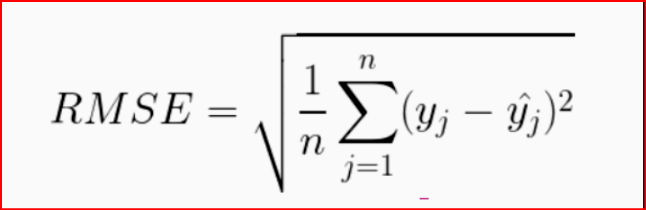

Donde:

n es el número de muestras;
Ŷ_j es la predicción del modelo para la muestra j;
Y_j es el valor real para la muestra j.
El RMSE es una medida de la dispersión de los residuos (errores de predicción) y, al igual que el MSE, penaliza los errores mayores de forma más severa que los errores menores, debido al hecho de elevar al cuadrado las diferencias. Esto lo hace particularmente sensible a grandes errores.

Un valor menor de RMSE indica un mejor ajuste del modelo a los datos, es decir, las predicciones del modelo están más cerca de los valores reales. Es importante resaltar que, aunque el RMSE es una métrica útil, no debe ser la única métrica considerada al evaluar la calidad de un modelo de regresión.

Puedes acceder a la documentación de scikit-learn para saber más sobre esta métrica: metrics.mean_squared_error.(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

Mean Squared Logarithmic Error - MSLE
El Error Logarítmico Cuadrático Medio es una métrica de evaluación utilizada en problemas de predicción donde la escala de los valores objetivo o de las predicciones varía significativamente y los errores relativos son más importantes que los errores absolutos. El MSLE mide el error cuadrático medio entre los logaritmos naturales de los valores reales y los logaritmos naturales de las predicciones. Matemáticamente, se puede definir el MSLE de la siguiente manera:

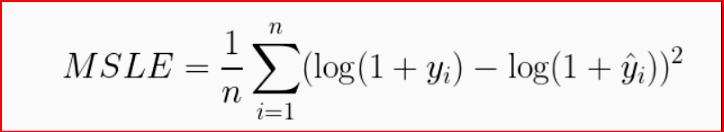

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSLE se calcula tomando el logaritmo natural de los valores reales y predichos sumados a 1, calculando la diferencia entre estos logaritmos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

El principal punto de enfoque de esta métrica es medir la diferencia relativa entre los valores esperados y los predichos por el modelo, es decir, verifica la diferencia porcentual entre ellos. De modo que, pequeñas diferencias entre valores pequeños son tratadas igualmente a grandes diferencias entre valores grandes, a diferencia de lo que ocurre en el MSE, como se muestra en el siguiente ejemplo:



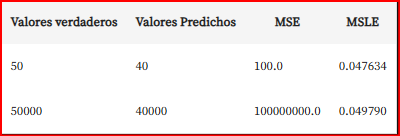

Esto nos muestra que las grandes diferencias entre los valores reales y predichos tienen poca variación en el resultado final de la métrica. Por lo tanto, esta métrica se utiliza más cuando no deseamos que grandes errores sean significativamente más penalizados que errores pequeños.

Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: metrics.mean_squared_log_error.(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error)

Mean Absolute Percentage Error - MAPE
El Mean Absolute Percentage Error es muy similar al Mean Absolute Error - MAE, con la diferencia de que mide la precisión como un porcentaje y puede ser calculado como el porcentaje del MAE para cada muestra. El MAPE se utiliza mucho en problemas de regresión, ya que proporciona una interpretación bastante intuitiva sobre el error relativo. La definición del MAPE es:

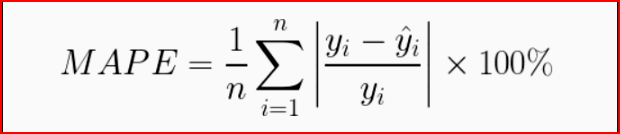

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación, "ŷ_i" es el valor predicho para la i-ésima observación, y el MAPE se calcula como la media de los porcentajes absolutos de las diferencias entre los valores reales y los valores predichos en relación con los valores reales. El resultado se multiplica por 100% para expresar el error como un porcentaje.

El MAPE se utiliza frecuentemente como una métrica de error para evaluar la precisión de las predicciones en problemas de predicción y se expresa como un porcentaje del error medio absoluto en relación con los valores reales. Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: metrics.mean_absolute_percentage_error.(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error)

#**Manos a la obra: otras estrategias para el DummyRegressor**

Como se indica en la documentación, (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)observamos que hay varias enfoques disponibles para implementar el DummyRegressor a través del parámetro 'strategy'. Durante el curso, optamos por la estrategia 'mean (media)', en la cual la salida corresponde a la media del conjunto de datos utilizado para el entrenamiento. Sin embargo, hasta el momento, no hemos explorado las demás estrategias disponibles.

Por lo tanto, sugerimos que pruebes las otras estrategias presentes en el parámetro strategy del DummyRegressor.(https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

Respuesta:

Para evaluar los modelos necesitamos utilizar algunas métricas, por lo tanto, vamos a utilizar la función definida durante el curso:

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calcular_metricas_regresion(y_test, y_pred):

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raíz del Error Cuadrático Medio': round(rmse, 4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

Para calcular las métricas de acuerdo con las diferentes estrategias, un ejemplo de código se describe a continuación:

In [87]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
Raíz del Error Cuadrático Medio: 23.4835
Error Absoluto Medio: 18.8124
R2 Score: -0.0


Estrategia: median
Raíz del Error Cuadrático Medio: 23.666
Error Absoluto Medio: 18.6728
R2 Score: -0.0156


Estrategia: quantile
Raíz del Error Cuadrático Medio: 29.018
Error Absoluto Medio: 22.0961
R2 Score: -0.5269


Estrategia: constant
Raíz del Error Cuadrático Medio: 23.6116
Error Absoluto Medio: 18.6815
R2 Score: -0.011




El DummyRegressor es una clase de scikit-learn que permite la creación de un modelo simple de referencia (o baseline) para comparación con modelos más complejos. Este modelo no toma en cuenta los datos de entrada y hace predicciones basadas en una estrategia simple especificada.

Las estrategias utilizadas en este código son: "mean", "median", ("quantile", 0.25), ("constant", 10.0). Cada una de estas estrategias define cómo el DummyRegressor hace sus predicciones:

"mean": predice la media de los valores de entrenamiento.
"median": predice la mediana de los valores de entrenamiento.
"quantile": predice un cuantil específico de los valores de entrenamiento. En el caso de este código, se utiliza el cuantil 0.25.
"constant": predice un valor constante especificado. En el caso de este código, se utiliza el valor 10.0.
El código recorre cada una de estas estrategias en un bucle, entrenando un DummyRegressor con la estrategia correspondiente y evaluando su desempeño utilizando un conjunto de métricas de regresión. Las métricas son calculadas por la función calcular_metricas_regresion.

Los resultados se almacenan en un diccionario, donde la clave es la estrategia utilizada y el valor es otro diccionario que contiene las métricas calculadas. Por último, el código imprime los resultados para cada estrategia.